# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

In [ ]:
import os
os.environ['OPENAI_API_KEY']="sk-"

In [ ]:
!pip install --upgrade langchain
!pip install openai
!pip install -U langchain-openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.2/806.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00


In [ ]:
# import os

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file

In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/langchain-workshop/main/OutdoorClothingCatalog_1000.csv

--2024-03-04 18:23:30--  https://raw.githubusercontent.com/alexjolly28/langchain-workshop/main/OutdoorClothingCatalog_1000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 751793 (734K) [text/plain]
Saving to: ‘OutdoorClothingCatalog_1000.csv’

OutdoorClothingCata 100%[===================>] 734.17K  --.-KB/s    in 0.03s   

2024-03-04 18:23:30 (21.7 MB/s) - ‘OutdoorClothingCatalog_1000.csv’ saved [751793/751793]



In [ ]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [ ]:
loader.load()

[Document(page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.", metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0}),
 Document(page_content=': 1\nname: Recycled Waterhog Dog Mat, Chevron Weave\ndescription: Protect your floors from spills an

In [ ]:
loader = CSVLoader(file_path=file)

In [ ]:
docs = loader.load()

In [ ]:
docs[0]

Document(page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.", metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0})

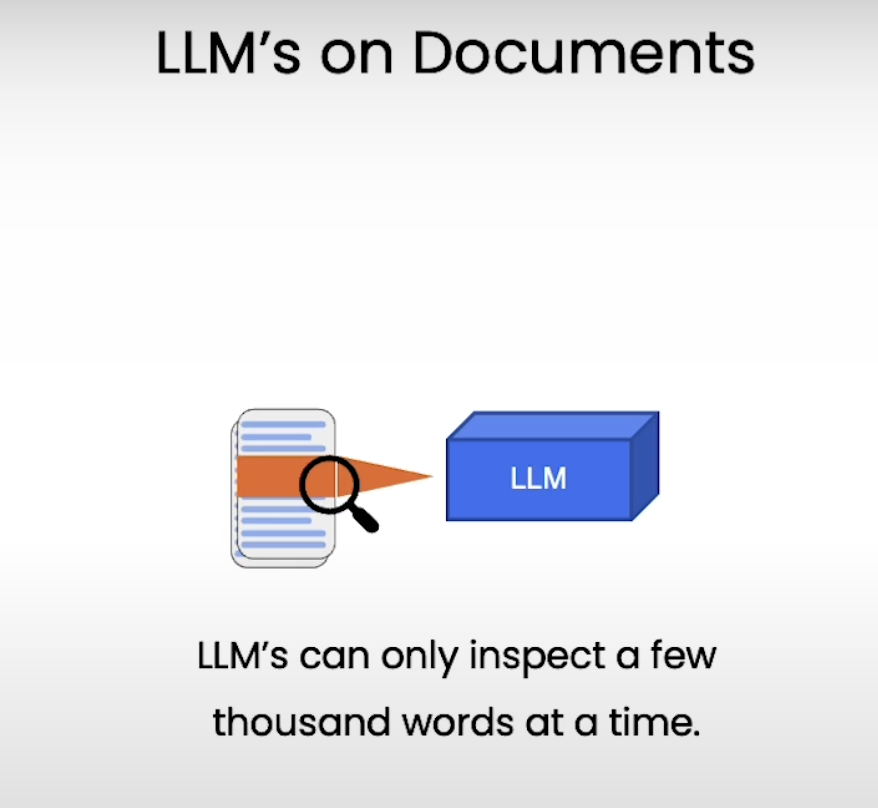

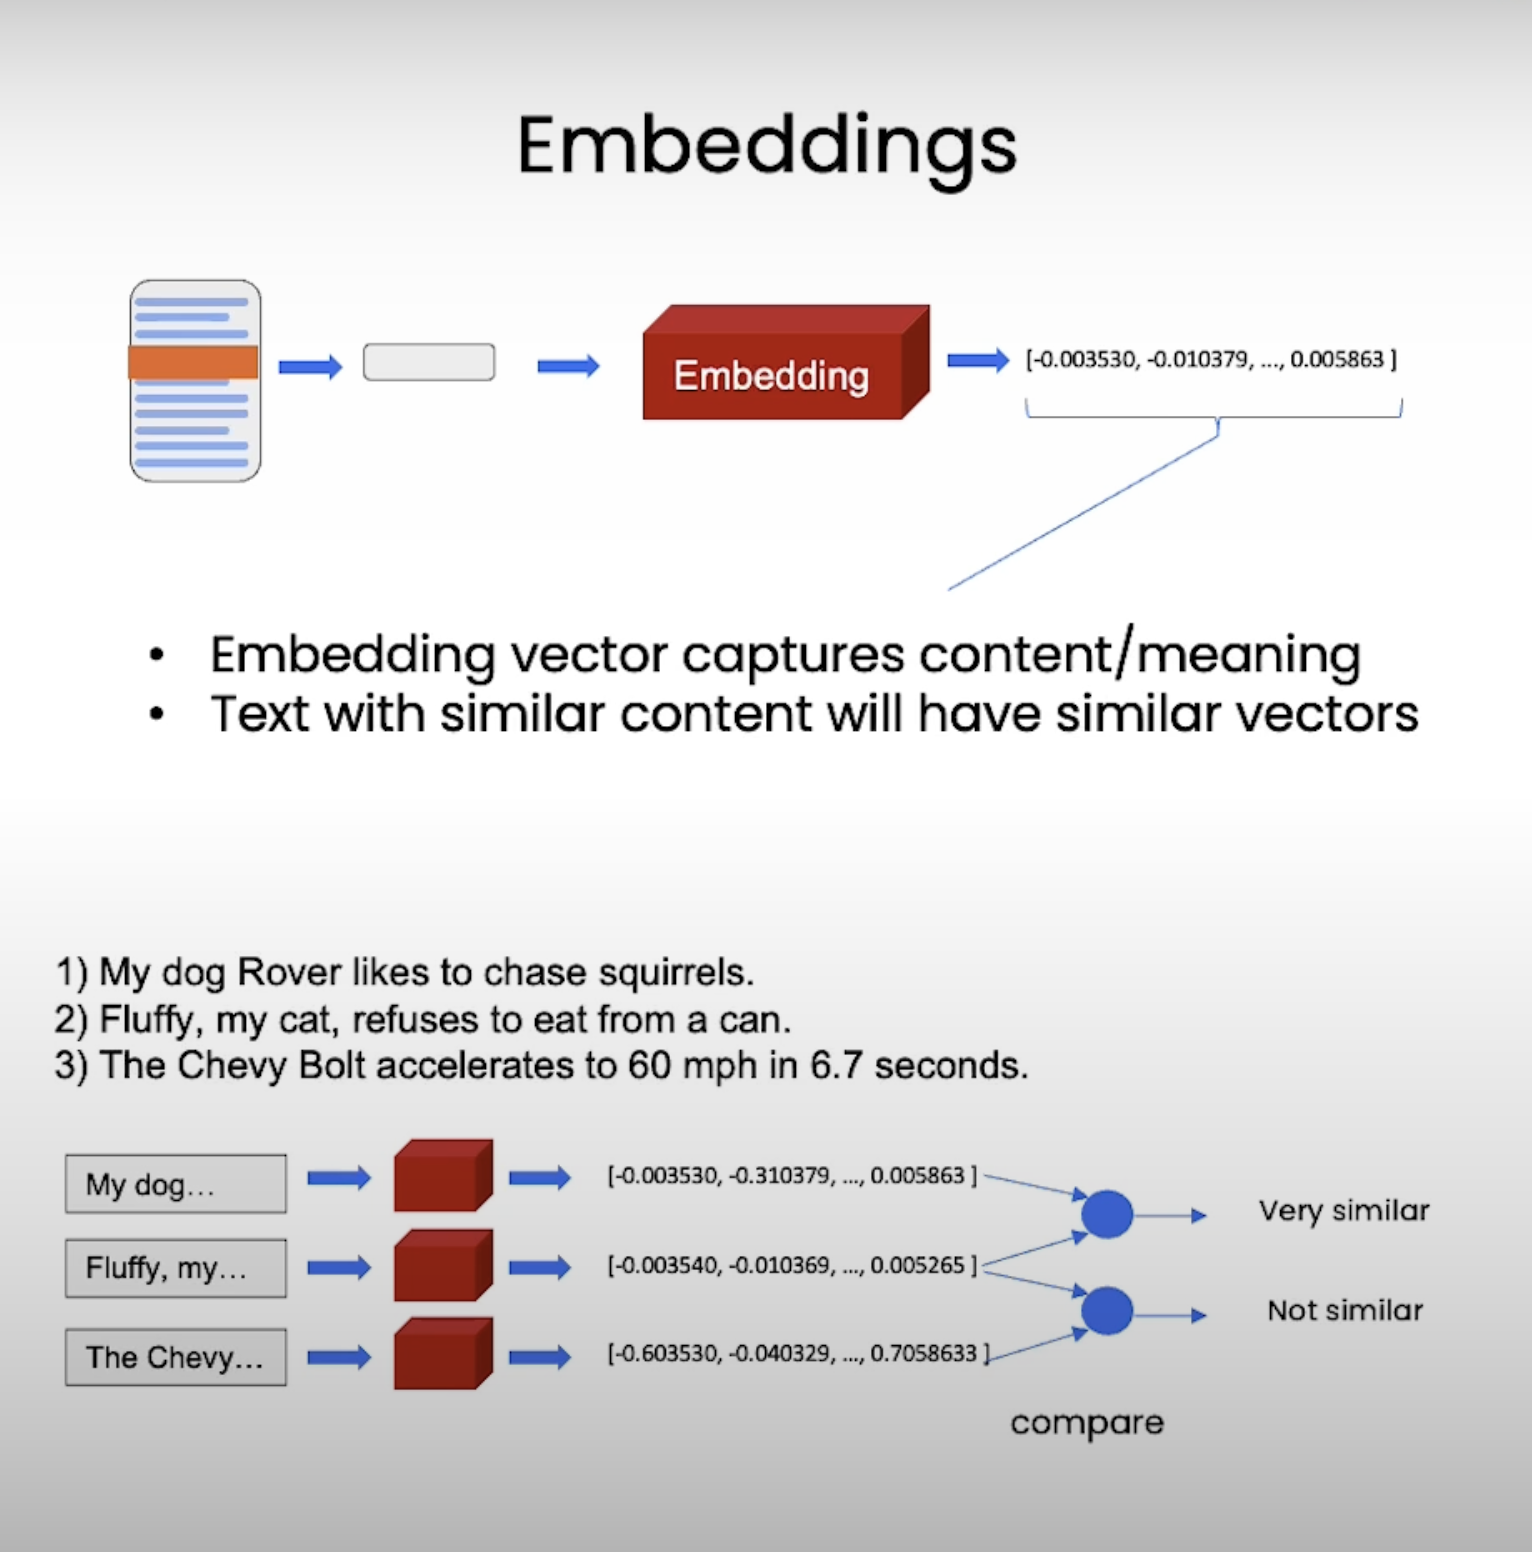

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [ ]:
embed = embeddings.embed_query("Hi my name is Harrison")

In [ ]:
print(len(embed))

1536


In [ ]:
print(embed[:5])

[-0.021935116222567927, 0.0067511968393128025, -0.018258349739335232, -0.03915192509902946, -0.013979244800643546]


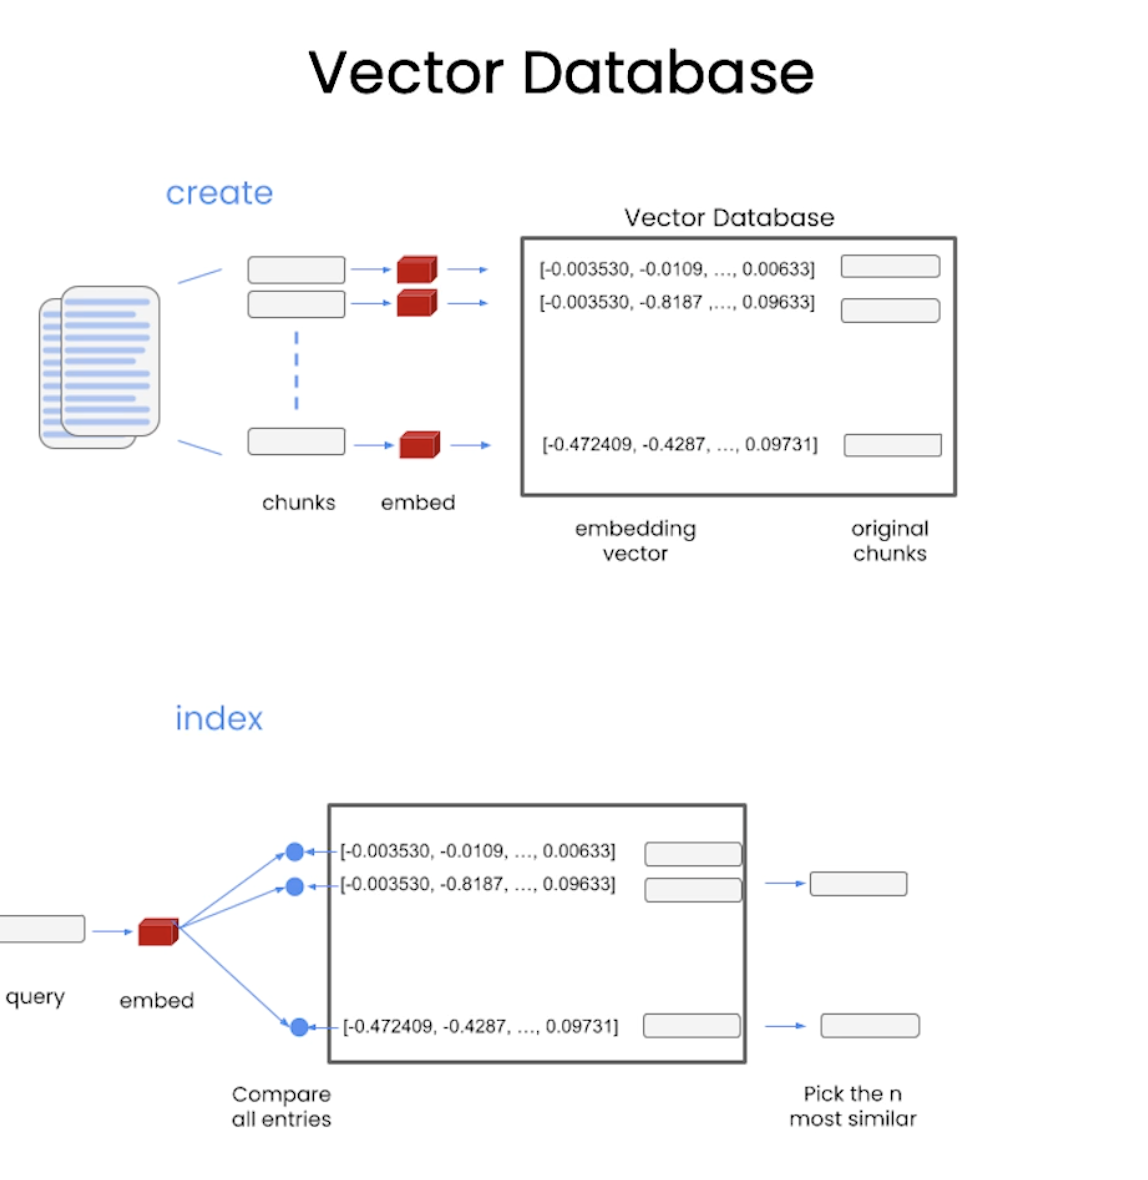

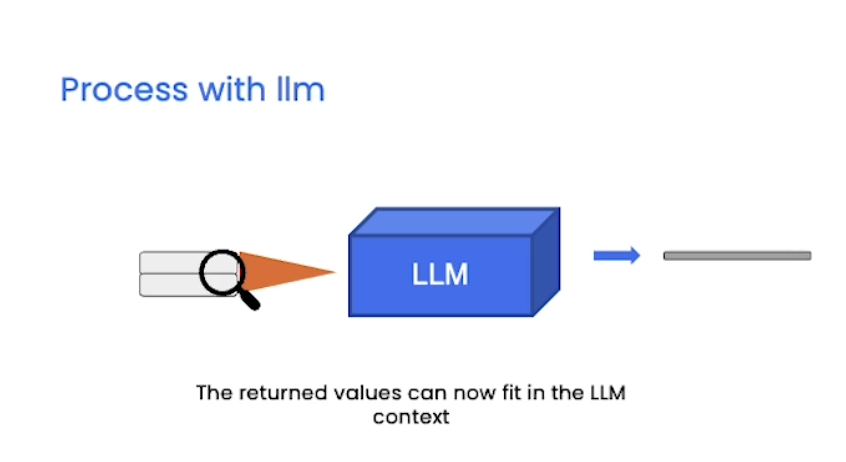

In [ ]:
!pip install chromadb

In [ ]:
from langchain.vectorstores import Chroma

db = Chroma.from_documents(documents=docs,embedding=OpenAIEmbeddings())


In [ ]:
query = "Please suggest a shirt with sunblocking"

In [ ]:
docs = db.similarity_search(query)

In [ ]:
len(docs)

4

In [ ]:
docs[0]

Document(page_content=": 618\nname: Men's Tropical Plaid Short-Sleeve Shirt\ndescription: Our lightest hot-weather shirt is rated UPF 50+ for superior protection from the sun's UV rays. With a traditional fit that is relaxed through the chest, sleeve, and waist, this fabric is made of 100% polyester and is wrinkle-resistant. With front and back cape venting that lets in cool breezes and two front bellows pockets, this shirt is imported and provides the highest rated sun protection possible. \n\nSun Protection That Won't Wear Off. Our high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun's harmful rays.", metadata={'row': 618, 'source': 'OutdoorClothingCatalog_1000.csv'})

In [ ]:
retriever = db.as_retriever()

In [ ]:
llm = ChatOpenAI(temperature = 0.0)


In [ ]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])
qdocs

': 618\nname: Men\'s Tropical Plaid Short-Sleeve Shirt\ndescription: Our lightest hot-weather shirt is rated UPF 50+ for superior protection from the sun\'s UV rays. With a traditional fit that is relaxed through the chest, sleeve, and waist, this fabric is made of 100% polyester and is wrinkle-resistant. With front and back cape venting that lets in cool breezes and two front bellows pockets, this shirt is imported and provides the highest rated sun protection possible. \n\nSun Protection That Won\'t Wear Off. Our high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays.: 374\nname: Men\'s Plaid Tropic Shirt, Short-Sleeve\ndescription: Our Ultracomfortable sun protection is rated to UPF 50+, helping you stay cool and dry. Originally designed for fishing, this lightest hot-weather shirt offers UPF 50+ coverage and is great for extended travel. SunSmart technology blocks 98% of the sun\'s harmful UV rays, while the high-performance fabric is wrink

': 618\nname: Men\'s Tropical Plaid Short-Sleeve Shirt\ndescription: Our lightest hot-weather shirt is rated UPF 50+ for superior protection from the sun\'s UV rays. With a traditional fit that is relaxed through the chest, sleeve, and waist, this fabric is made of 100% polyester and is wrinkle-resistant. With front and back cape venting that lets in cool breezes and two front bellows pockets, this shirt is imported and provides the highest rated sun protection possible. \n\nSun Protection That Won\'t Wear Off. Our high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays.: 374\nname: Men\'s Plaid Tropic Shirt, Short-Sleeve\ndescription: Our Ultracomfortable sun protection is rated to UPF 50+, helping you stay cool and dry. Originally designed for fishing, this lightest hot-weather shirt offers UPF 50+ coverage and is great for extended travel. SunSmart technology blocks 98% of the sun\'s harmful UV rays, while the high-performance fabric is wrink

In [ ]:
response = llm.invoke(f"{qdocs} Question: Please list all your \
shirts with sun protection in Markdown")


In [ ]:
response

AIMessage(content="- Men's Tropical Plaid Short-Sleeve Shirt\n- Men's Plaid Tropic Shirt, Short-Sleeve\n- Men's TropicVibe Shirt, Short-Sleeve\n- Sun Shield Shirt by")

In [ ]:
display(Markdown(response.content))

- Men's Tropical Plaid Short-Sleeve Shirt
- Men's Plaid Tropic Shirt, Short-Sleeve
- Men's TropicVibe Shirt, Short-Sleeve
- Sun Shield Shirt by

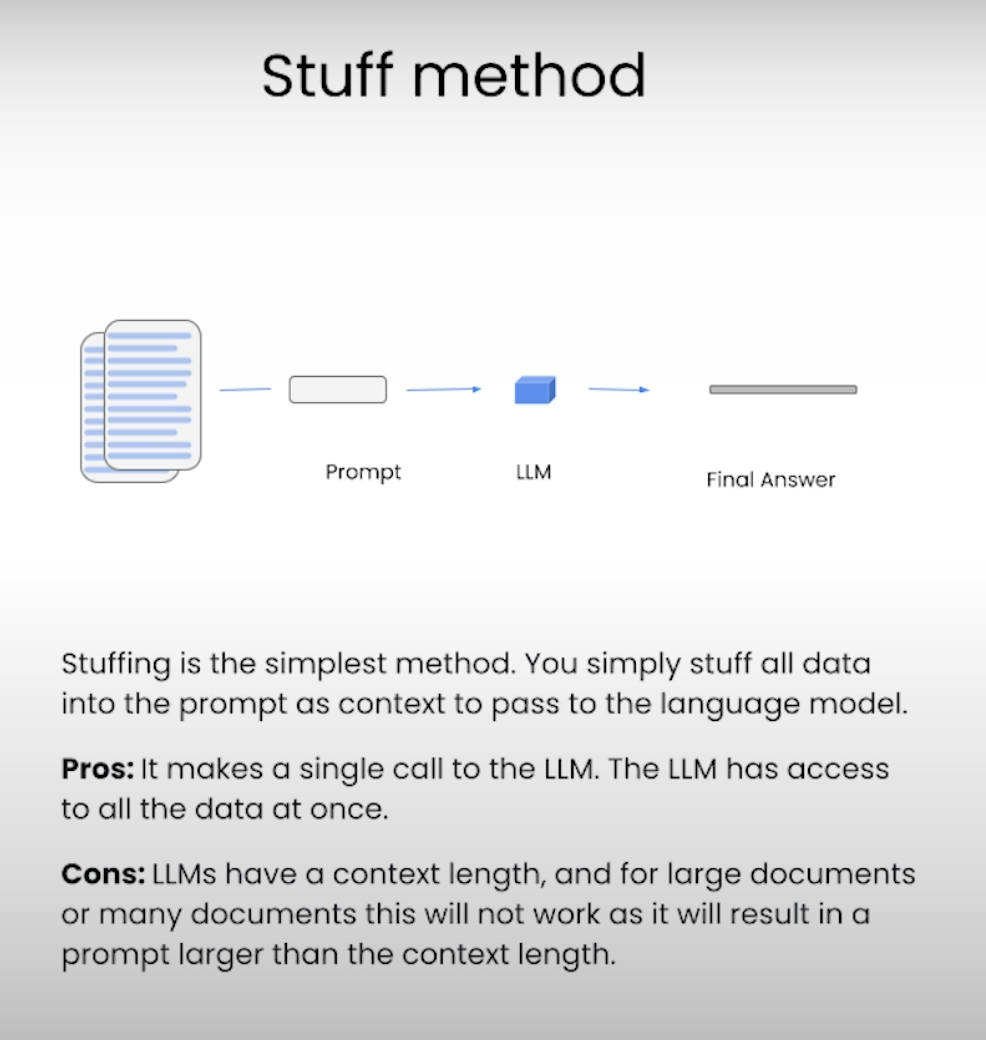

In [ ]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    verbose=True
)

In [ ]:
query =  "Please list all your shirts with sun protection \
in markdown and summarize each one."

In [ ]:
response = qa_stuff.invoke(query)



> Entering new RetrievalQA chain...

> Finished chain.


In [ ]:
response["result"]

"- **Men's Tropical Plaid Short-Sleeve Shirt**\n  - Description: Rated UPF 50+ for superior sun protection, this shirt is made of 100% polyester, wrinkle-resistant, and features front and back cape venting for cool breezes. It provides SPF 50+ sun protection, blocking 98% of harmful rays.\n  \n- **Men's Plaid Tropic Shirt, Short-Sleeve**\n  - Description: This shirt offers UPF 50+ sun protection, designed for fishing and extended travel. Made of 52% polyester and 48% nylon, it features SunSmart technology blocking 98% of UV rays. The fabric is wrinkle-free, quick-drying, with front and back cape venting, two front bellows pockets, and is machine washable."

In [ ]:
display(Markdown(response["result"]))

- **Men's Tropical Plaid Short-Sleeve Shirt**
  - Description: Rated UPF 50+ for superior sun protection, this shirt is made of 100% polyester, wrinkle-resistant, and features front and back cape venting for cool breezes. It provides SPF 50+ sun protection, blocking 98% of harmful rays.
  
- **Men's Plaid Tropic Shirt, Short-Sleeve**
  - Description: This shirt offers UPF 50+ sun protection, designed for fishing and extended travel. Made of 52% polyester and 48% nylon, it features SunSmart technology blocking 98% of UV rays. The fabric is wrinkle-free, quick-drying, with front and back cape venting, two front bellows pockets, and is machine washable.

In [ ]:
from langchain.indexes import VectorstoreIndexCreator

index = VectorstoreIndexCreator(
    vectorstore_cls=Chroma
).from_loaders([loader])

In [ ]:
response = index.query(query)

In [ ]:
response

"\n1. Men's Tropical Plaid Short-Sleeve Shirt - This shirt is rated UPF 50+ for superior protection from the sun's UV rays. It is made of 100% polyester and is wrinkle-resistant. It also features front and back cape venting and two front bellows pockets. The high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun's harmful rays."

In [ ]:
response = index.query(query, llm=llm)
response

"- **Men's Tropical Plaid Short-Sleeve Shirt**\n  - Description: Our lightest hot-weather shirt is rated UPF 50+ for superior protection from the sun's UV rays. Made of 100% polyester, wrinkle-resistant, with front and back cape venting for cool breezes and two front bellows pockets. Imported for the highest sun protection.\n  - Sun Protection: SPF 50+, blocks 98% of harmful rays."

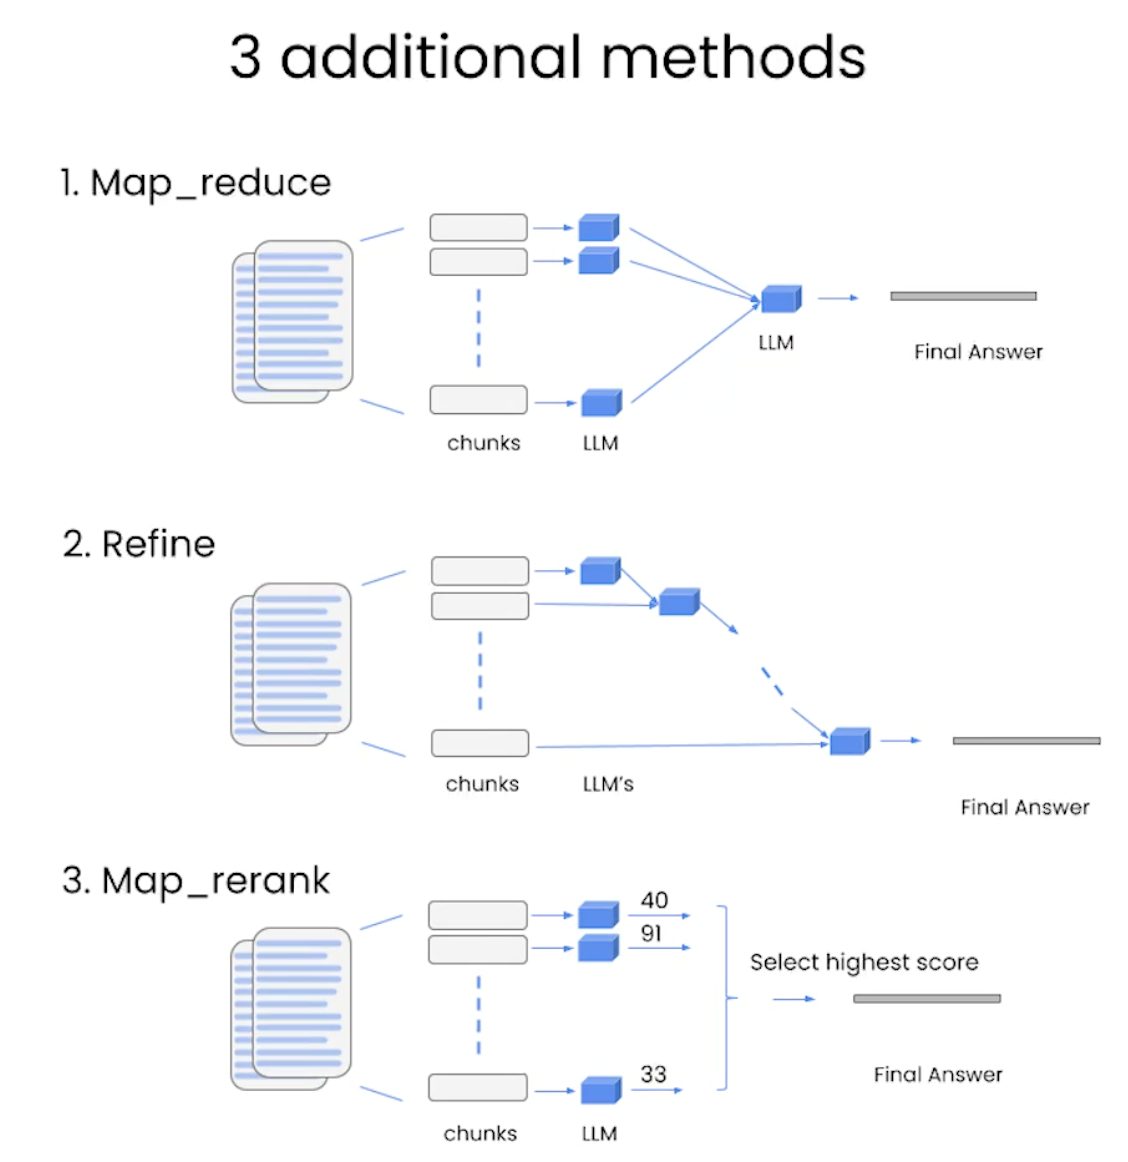